In [1]:
import os
import sys
sys.path.append(os.environ['COOPERHEWITT_ROOT'] + '/src')
sys.path.append(os.environ['COOPERHEWITT_ROOT'] + '/src/apps')

In [2]:
%matplotlib inline
from IPython.core.display import display, HTML
import pandas as pd
import utils
import models
import semantics
pd.set_option('display.max_colwidth', 100)
root_path   = os.environ['COOPERHEWITT_ROOT']
export_path = root_path + '/export/'
df_features = pd.read_pickle(export_path + 'penmeta_features.pkl')

First component: 0.0832982365551
Second component: 0.0682679583837


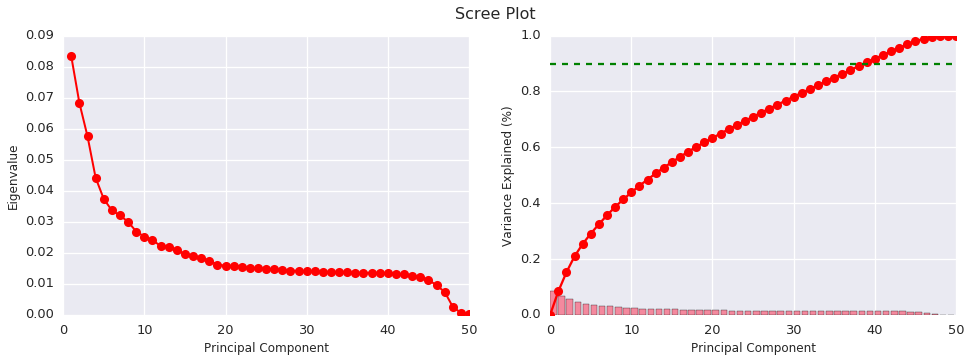

In [3]:
# perform pca, is their an elbow
%matplotlib inline
pca_model, features_transformed = models.execute_PCA(df_features, 50)
models.scree_plot(pca_model, filename=root_path + '/plots/scree_plot.png')

First component: 0.0832982365551
Second component: 0.0682679583837


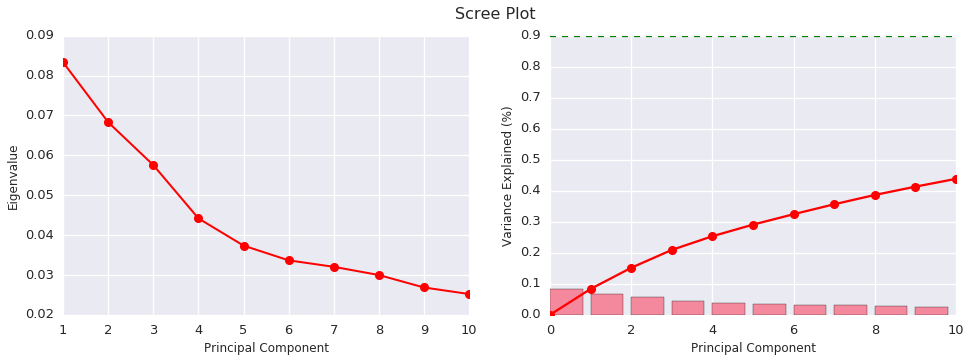

In [4]:
# compare on dimensionality reduction now
# note we really need MCA, not PCA (as we have all categorical data)
pca_model, features_pca = models.execute_PCA(df_features, 10)
models.scree_plot(pca_model, filename=root_path + '/plots/scree_plot_minimized.png')

coph distance metric evaluation 0.710346636965


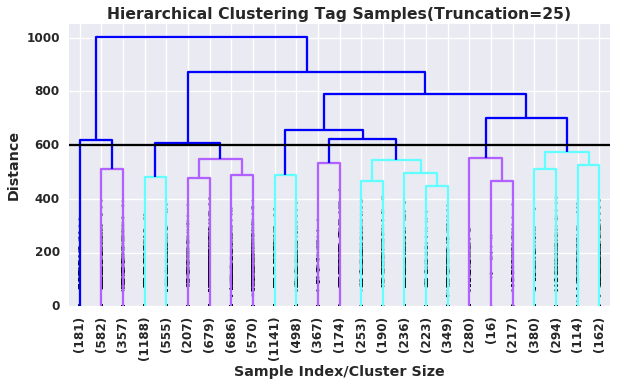

In [3]:
# we can only take a fraction of the the data due to pairwise computations and computationally expensive
samples = df_features.sample(frac=0.00275)
X = samples.values
Z, cutoff, clusters = models.execute_hierarchical_clustering(X, 'cityblock')
samples['cluster'] = clusters
models.plot_dendrogram(Z, cutoff, filename=root_path + '/plots/dendrogram.png')

In [105]:
# review the way types of artwork are associated with rooms
rooms_table = pd.read_pickle(export_path + "rooms_table.pkl")
display(semantics.explore_room_types())
display(rooms_table[rooms_table.name.isin(['103','206'])])

,query,rooms
0,Concept art,{u'103': 637}
1,Drawing,"{u'201': 58, u'202': 10102, u'205': 24814, u'206': 85, u'105': 134}"
2,poster,"{u'201': 39, u'202': 2270, u'205': 514, u'107': 46, u'206': 31}"
3,Print,"{u'201': 65, u'203': 30, u'202': 3994, u'205': 16037, u'105': 27}"
4,Sidewall,"{u'202': 19, u'205': 7, u'213': 22, u'101': 11, u'206': 42}"
5,textile,"{u'202': 25, u'205': 12, u'107': 3, u'105': 6, u'206': 24}"
6,Staircase model,"{u'212': 7, u'105': 21}"


,id,name,floor,room_count_objects,count_spots,description
1,68744887,103,1.0,793,1,Process Lab\nMr. Carnegie's Library
17,68527343,206,2.0,570,15,"Long gallery, East"


In [93]:
# explore the cluster features based on z-score
pd.DataFrame(semantics.explore_cluster_features(samples, scale_option=False, k=15)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,"(afternoon, 0.701657458564)","(month_1, 0.635359116022)","(weekend, 0.513812154696)","(month_2, 0.364640883978)","(wom_2, 0.314917127072)","(wom_1, 0.28729281768)","(tagged_after_close, 0.270718232044)","(wom_3, 0.254143646409)","(morning, 0.198895027624)","(Fri, 0.160220994475)","(Mon, 0.149171270718)","(wom_4, 0.14364640884)","(is_bursty, 0.0939226519337)","(evening, 0.0773480662983)","(Tues, 0.0718232044199)"
2,"(afternoon, 0.666666666667)","(wom_4, 0.386581469649)","(quarter_4, 0.37167199148)","(weekend, 0.367412140575)","(tagged_after_close, 0.305644302449)","(quarter_2, 0.283280085197)","(quarter_3, 0.281150159744)","(morning, 0.241746538871)","(wom_3, 0.214057507987)","(wom_2, 0.205537806177)","(wom_1, 0.193823216187)","(Tues, 0.143769968051)","(month_11, 0.136315228967)","(Fri, 0.134185303514)","(month_12, 0.133120340788)"
3,"(visitor_drawn, 0.991967871486)","(afternoon, 0.681583476764)","(wom_4, 0.39701663798)","(weekend, 0.374641422834)","(quarter_4, 0.309810671256)","(quarter_2, 0.301204819277)","(quarter_3, 0.26792885829)","(morning, 0.242685025818)","(wom_3, 0.232931726908)","(wom_2, 0.19850831899)","(month_4, 0.17900172117)","(wom_1, 0.171543316122)","(Wed, 0.155479059094)","(Fri, 0.12794033276)","(Tues, 0.121629374641)"
4,"(spot_normal_freq, 0.958916900093)","(visitor_drawn, 0.819327731092)","(room_small_cap, 0.81746031746)","(afternoon, 0.708216619981)","(floor_2, 0.52380952381)","(floor_1, 0.47619047619)","(wom_4, 0.404761904762)","(weekend, 0.403361344538)","(quarter_4, 0.380952380952)","(quarter_3, 0.328664799253)","(rm_201, 0.287114845938)","(rm_107, 0.260971055089)","(quarter_2, 0.235294117647)","(wom_3, 0.231559290383)","(morning, 0.21335200747)"
5,"(room_midsize_cap, 0.999389871873)","(spot_high_freq, 0.999389871873)","(rm_206, 0.999389871873)","(afternoon, 0.685784014643)","(wom_4, 0.38071995119)","(weekend, 0.377669310555)","(quarter_4, 0.342892007322)","(quarter_3, 0.320927394753)","(quarter_2, 0.268456375839)","(morning, 0.243441122636)","(wom_3, 0.237949969494)","(wom_2, 0.201342281879)","(wom_1, 0.179987797437)","(month_12, 0.143380109823)","(Wed, 0.136668700427)"
6,"(year_2015, 0.998151571165)","(spot_dynamic_freq, 0.770794824399)","(rm_103, 0.770794824399)","(quarter_4, 0.739371534196)","(afternoon, 0.47134935305)","(wom_4, 0.415896487985)","(morning, 0.402957486137)","(weekend, 0.34011090573)","(month_11, 0.290203327172)","(visitor_drawn, 0.260628465804)","(month_12, 0.249537892791)","(wom_3, 0.242144177449)","(rm_105, 0.229205175601)","(spot_high_freq, 0.229205175601)","(wom_2, 0.20887245841)"
7,"(afternoon, 0.736211031175)","(spot_constant_freq, 0.694644284572)","(room_small_cap, 0.543565147882)","(floor_2, 0.533173461231)","(floor_1, 0.466826538769)","(visitor_drawn, 0.458832933653)","(weekend, 0.372501998401)","(wom_4, 0.354116706635)","(quarter_2, 0.338928856914)","(quarter_3, 0.2965627498)","(quarter_4, 0.270183852918)","(rm_212, 0.263788968825)","(wom_3, 0.242206235012)","(wom_1, 0.205435651479)","(morning, 0.200639488409)"
8,"(room_midsize_cap, 0.968810916179)","(month_1, 0.734892787524)","(afternoon, 0.658869395712)","(spot_high_freq, 0.625730994152)","(floor_2, 0.576998050682)","(rm_206, 0.545808966862)","(weekend, 0.524366471735)","(floor_1, 0.423001949318)","(spot_dynamic_freq, 0.343079922027)","(rm_103, 0.343079922027)","(wom_2, 0.309941520468)","(wom_3, 0.278752436647)","(month_2, 0.265107212476)","(wom_1, 0.247563352827)","(morning, 0.224171539961)"
9,"(room_small_cap, 0.894736842105)","(quarter_1, 0.829473684211)","(year_2016, 0.827368421053)","(spot_normal_freq, 0.664210526316)","(afternoon, 0.6)","(weekend, 0.509473684211)","(month_2, 0.417894736842)","(month_1, 0.409473684211)","(visitor_drawn, 0.405263157895)","(floor_1, 0.377894736842)","(wom_3, 0.353684210526)","(wom_2, 0.337894736842)","(spot_constant_freq, 0.328421052632)","(floor_2, 0.318947368421)","(floor_3, 0.303157894737)"


In [66]:
# TBD: SCALE and CENTER DATA (not required, as all data is categorical)
# explore the semantics overall
turnover_cols = [item for item in list(samples.columns) if "_freq"    in item]
capacity_cols = [item for item in list(samples.columns) if "_cap"     in item]
floor_cols    = [item for item in list(samples.columns) if "floor_"   in item]
room_cols     = [item for item in list(samples.columns) if "room_"    in item]
quarter_cols  = [item for item in list(samples.columns) if "quarter_" in item]
month_cols    = [item for item in list(samples.columns) if "month_"   in item]
year_cols     = [item for item in list(samples.columns) if "year_"    in item]
wom_cols      = [item for item in list(samples.columns) if "wom_"     in item]
days_cols     = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'weekend']
tod_cols      = ['pre-morning', 'morning', 'afternoon', 'evening', 'night', 'tagged_after_close']
evt_cols      = ['is_bursty', 'during_exhibition', 'visitor_drawn', 'meta_store']
semantics.explore_clusters_corr(samples, 'during_exhibition')

Cluster Label:4, Pct Sample Obs:0.216385493484
[('during_exhibition', 1.0), ('night', 0.57708054234977135), ('evening', 0.1180370855294416), ('month_10', 0.10493596303746014), ('Wed', 0.098820713164624444), ('quarter_4', 0.047739945373780797), ('wom_4', 0.045415152695787678), (u'rm_107', 0.034596219999364297), ('room_small_cap', 0.017697036260052305), ('visitor_drawn', 0.017586206045519869)]

Cluster Label:3, Pct Sample Obs:0.176078391757
[('during_exhibition', 1.0), ('night', 0.77415137074579732), ('evening', 0.10553363665913187), ('is_bursty', 0.089493374635081266), ('Wed', 0.065797770431347866), ('month_4', 0.058903446921032436), ('Tues', 0.045679925032047992), ('wom_4', 0.044176389023181398), ('quarter_2', 0.034932349433483889), ('month_10', 0.017923311781698901)]

Cluster Label:5, Pct Sample Obs:0.165572280028
[('during_exhibition', 1.0), ('evening', 0.16074296289580411), ('is_bursty', 0.05414499078345486), ('quarter_4', 0.048387184432470143), ('month_11', 0.047592011429887851), (

In [76]:
semantics.explore_clusters_corr(samples, 'is_bursty')

Cluster Label:4, Pct Sample Obs:0.216385493484
[('is_bursty', 1.0), ('month_6', 0.087654856868628145), ('wom_1', 0.057292205307452229), ('spot_normal_freq', 0.054216297045675058), (u'rm_107', 0.053739884207996837), ('room_small_cap', 0.042939136976411628), ('month_12', 0.042153764447651863), ('floor_1', 0.041394020395150624), ('Wed', 0.027395343509350911), ('quarter_2', 0.022401845988167194)]

Cluster Label:3, Pct Sample Obs:0.176078391757
[('is_bursty', 1.0), ('during_exhibition', 0.089493374635081266), ('night', 0.078515762356798191), ('Tues', 0.069307248440799565), ('month_10', 0.055097690160657922), ('month_7', 0.047746166951921097), ('quarter_4', 0.045912229949782696), ('month_12', 0.043188785619087761), ('wom_4', 0.038799789830149985), ('visitor_drawn', 0.029966061986771268)]

Cluster Label:5, Pct Sample Obs:0.165572280028
[('is_bursty', 1.0), ('Thur', 0.056207982894721627), ('wom_1', 0.055176809831041056), ('during_exhibition', 0.05414499078345486), ('pre-morning', 0.05187207837

In [154]:
# review exibitions
tr   = utils.Transforms()
rooms_table = pd.read_pickle(export_path + "rooms_table.pkl")
room_map    = tr.rename_rooms(df_features, rooms_table)[1]
df_features_renamed = df_features.rename(columns=room_map)
df_features_renamed.corr(method='pearson')['during_exhibition'].sort_values(ascending=False)[:10]

during_exhibition    1.000000
night                0.377217
evening              0.205980
Mon                  0.050296
month_10             0.041814
Wed                  0.038824
quarter_4            0.036959
year_2014            0.033618
month_11             0.028681
year_2015            0.021858
Name: during_exhibition, dtype: float64